In [92]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from PIL import Image, ImageOps
from torchvision.transforms import transforms
from torch.optim import Adam

# class Lenet(nn.Module):
#     def __init__(self):
#         super().__init__()
#     def forward(self,x):
#         return x

# model  = torch.load('model_all.pth',weight_only=False) #model_all.pth
# model

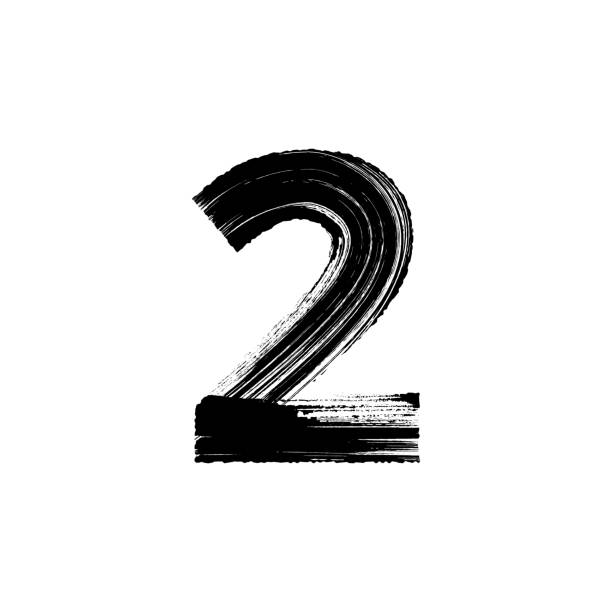

In [109]:
img = Image.open('./data/number_2.jpg').convert('L') # 만약 컬러 모델이라면 .convert('RGB') 사용
img

In [96]:
img_inverted = ImageOps.invert(img)
img_inverted.show()

In [97]:
img_inverted.size

(612, 612)

In [110]:
img_np = np.array(img)

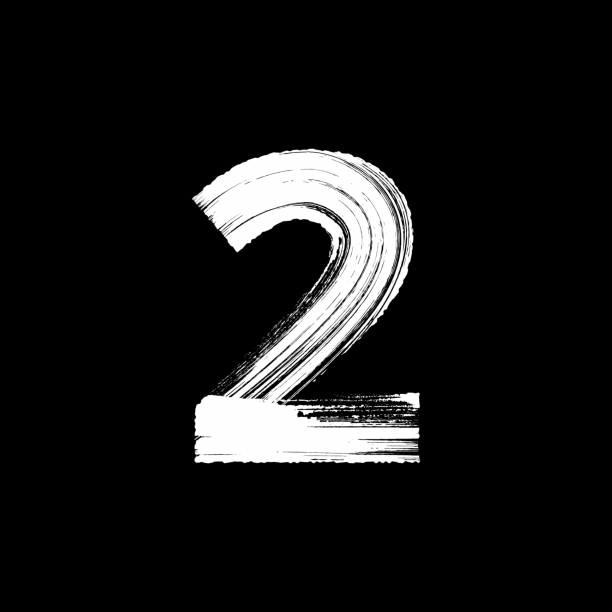

In [111]:
if np.mean(img_np)>127.5:
    img_inverted = ImageOps.invert(img)
else :
    img_inverted = img

img_inverted

In [99]:
infer_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(32),
        transforms.Normalize((0.5,),(1.0,)),
        transforms.Grayscale()
    ]
)

img = infer_transform(img_np)

In [100]:
img.size()

torch.Size([1, 32, 32])

In [101]:
class Lenet(nn.Module):
    def __init__(self):
        super(Lenet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1) # 5*5레이어를 1칸씩 이동하며 특징을 뽑아냄
        #self.conv1_tanh = nn.Tanh()
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
        self.conv3 = nn.Conv2d(in_channels=16,out_channels=120,kernel_size=5,stride=1)
        self.fc1 = nn.Linear(in_features=120,out_features=84)
        self.fc2 = nn.Linear(in_features=84,out_features=10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = F.tanh(x) # 활성화 함수 통과 ( 모델 정보 보기시 내용 출력 안됨. )
        #x = self.conv1_tanh(x)
        x = F.max_pool2d(x,2,2) # 이미지를 반으로 줄이겠다 (Subsampling)

        x = self.conv2(x)
        x = F.tanh(x)
        x = F.max_pool2d(x,2,2) # 이미지를 반으로 줄이겠다 (Subsampling)

        x = self.conv3(x)
        x = F.tanh(x)

        x = x.view(-1,120) # 120개의 데이터를 1차원으로 평평하게 편다 
        x = self.fc1(x)
        x = F.tanh(x)
        
        x = self.fc2(x)
        x = F.tanh(x)

        return x

In [102]:
model = Lenet()
model

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [103]:
optim = Adam(model.parameters(),lr=3e-3)

In [104]:
checkpoint = torch.load('checkpoint.pth') 
model.load_state_dict(checkpoint['model_state_dict'])
optim.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [105]:
pred = model(img)
pred

tensor([[-1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000]], grad_fn=<TanhBackward0>)

In [106]:
torch.max(pred,1)

torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([2]))

In [107]:
result = torch.max(pred,1)[1].item()
result

2